# Lab 7

This lab is about Event Selection Optmization. 
I am using the higher pT sample.

In [43]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle as pk
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

### Load in LHC Data: High pT (transverse momentum) data set

First load in Higgs data, then load QCD data:

In [44]:
#---Load Higgs Data & Define Variables---
pickle_higgs = open('higgs_100000_pt_1000_1200.pkl', 'rb')
higgs = pk.load(pickle_higgs)

#Define 
hMass = higgs['mass']
hPt = higgs['pt']
hEta = higgs['eta']
hPhi = higgs['phi']
hEe2 = higgs['ee2']
hEe3 = higgs['ee3']
hD2 = higgs['d2']
hAngularity = higgs['angularity']
hT1 = higgs['t1']
hT2 = higgs['t2']
hT3 = higgs['t3']
hT21 = higgs['t21']
hT32 = higgs['t32']
hKtDeltaR = higgs['KtDeltaR']



#---Load QCD Data & Define Variables---
pickle_qcd = open('qcd_100000_pt_1000_1200.pkl', 'rb')
qcd = pk.load(pickle_qcd)

#Define data features
qMass = qcd['mass']
qPt = qcd['pt']
qEta = qcd['eta']
qPhi = qcd['phi']
qEe2 = qcd['ee2']
qEe3 = qcd['ee3']
qD2 = qcd['d2']
qAngularity = qcd['angularity']
qT1 = qcd['t1']
qT2 = qcd['t2']
qT3 = qcd['t3']
qT21 = qcd['t21']
qT32 = qcd['t32']
qKtDeltaR = qcd['KtDeltaR']

### Load in High Pt Luminosity Data (for Lab 8): High lumi, and Low Lumi

In [46]:
#Load in high luminosity data
hlumi = pd.read_hdf('data_highLumi_pt_1000_1200.h5', mode='r')

#define
hlumiMass = hlumi['mass']
hlumiPt = hlumi['pt']
hlumiEta = hlumi['eta']
hlumiPhi = hlumi['phi']
hlumiEe2 = hlumi['ee2']
hlumiEe3 = hlumi['ee3']
hlumiD2 = hlumi['d2']
hlumiAngularity = hlumi['angularity']
hlumiT1 = hlumi['t1']
hlumiT2 = hlumi['t2']
hlumiT3 = hlumi['t3']
hlumiT21 = hlumi['t21']
hlumiT32 = hlumi['t32']
hlumiKtDeltaR = hlumi['KtDeltaR']

#Load in low luminosity data
llumi = pd.read_hdf('data_lowLumi_pt_1000_1200.h5', mode='r')

#define
llumiMass = llumi['mass']
llumiPt = llumi['pt']
llumiEta = llumi['eta']
llumiPhi = llumi['phi']
llumiEe2 = llumi['ee2']
llumiEe3 = llumi['ee3']
llumiD2 = llumi['d2']
llumiAngularity = llumi['angularity']
llumiT1 = llumi['t1']
llumiT2 = llumi['t2']
llumiT3 = llumi['t3']
llumiT21 = llumi['t21']
llumiT32 = llumi['t32']
llumiKtDeltaR = llumi['KtDeltaR']

### Problem 1
Make stacked histogram plot for feature mass variable.
- Use poisson statistics to calculate significance
- Compaire $\frac{N_{higgs}}{\sqrt{N_{qcd}}}$.  If they are the same explain findings

The expected yeilds of number of particles is $N_{higgs} = 50$ and $N_{qcd} = 50$.

The respective data sets are normalized to the expected yeild values in all the following plots.

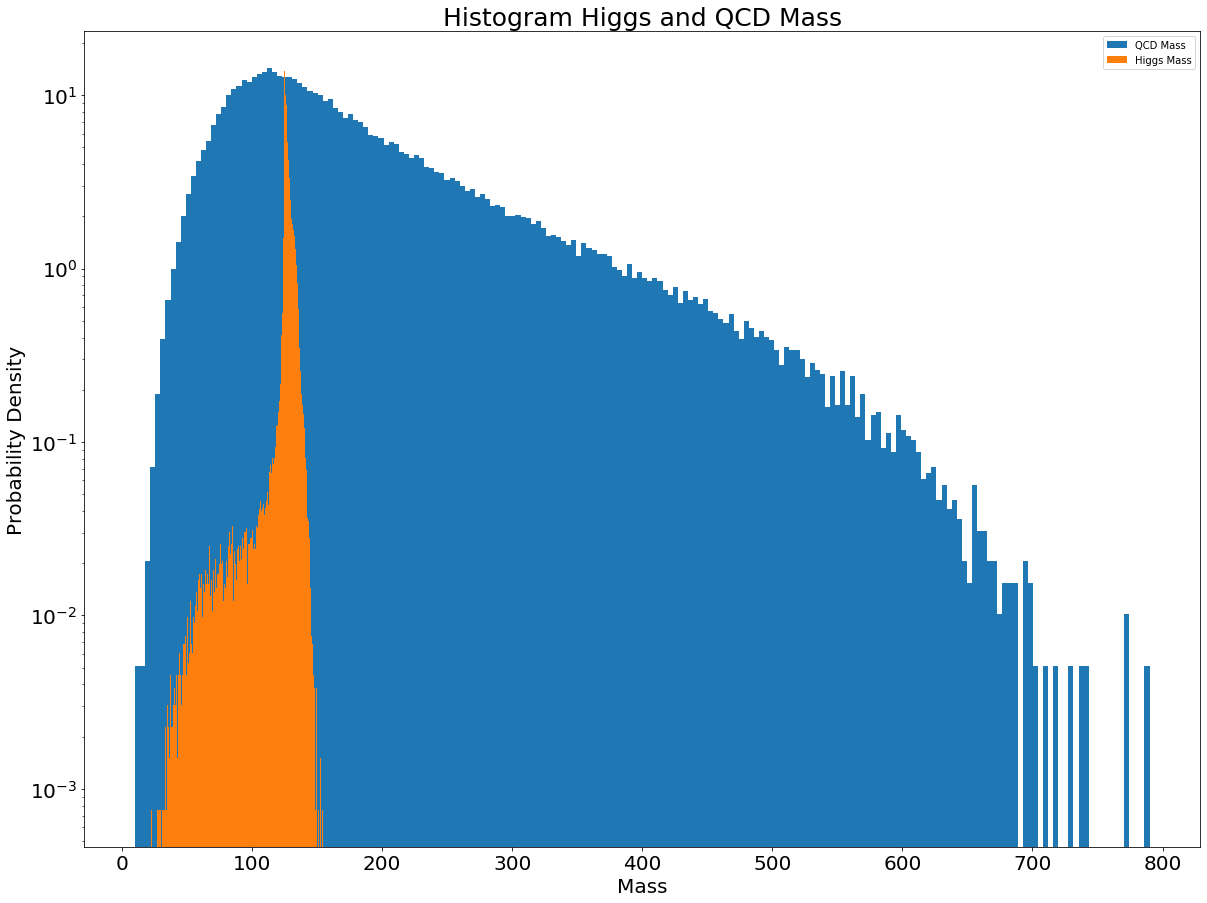

In [3]:
#---PLOT of higgs and QCD normalized mass data --- 
n_higgs = 50
n_qcd = 2000


#qcd data
hist_qcd, bins_q = np.histogram(qMass, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

#higgs 
hist_higgs, bins_higgs = np.histogram(hMass, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs


plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = 'Higgs Mass')
#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Histogram Higgs and QCD Mass', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

This is a graph of the Mass Probability distributions for Higgs Mass data in orange, and background QCD data in blue. 

We can visually see that there is a large amount of QCD data that has no overlap with any Higgs data on the right side of the graph greater than about Masss = 150. Cutting out this data will increase the signal to noise ratio.

By checking that the area of the graph should add up to the number of expected yield particles, we can see that the graph is normalized:

In [4]:
print('QCD area = ', (hist_qcd * widths_qcd).sum())

print('Higgs area = ', (hist_higgs * widths_higgs).sum())

QCD area =  2000.0
Higgs area =  50.0


The expected yeild of particles is $N_{qcd} = 2000$ for QCD, and $N_{higgs} = 50$ for Higgs, matching the values above.

**Significance Calculation:**
Using poisson statistics we will calculate 5 sigma significance in both Higgs and QCD Mass data.

In [5]:
#--- significance calculation --- 

#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)


#Higgs: Calculate 5 sigma upper bound
hMean = np.mean(hMass)
hStd = np.std(hMass)

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound  = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qMean = np.mean(qMass)
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('Upper Bound = ', qUpper)
qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound = ', qLower)

print()
#Calculate Signal to Noise Ratios
stn = hUpper / qUpper
print('signal to noise ratio = ', stn)

Higgs Signal 5 sigma detection:
Upper bound  =  187.0
Lower bound =  75.0

QCD Signal 5 sigma detection:
Upper Bound =  248.0
Lower bound =  115.0

signal to noise ratio =  0.7540322580645161


The upper limit of the mass signal strength corresponding to a 5 sigma detection from the background QCD signal is 248. For higgs data it is 187. 

The detection on the Mass x axis needs to be less than (or equal to) the upper bound value of higgs to have a legitamite higgs detection. 

**The signal to noise ratio signifance value is 0.75**. To calculate the signal to noise ratio, I used the upper bound 5 sigma signal detection for a Higgs value by the upper bound 5 sigma signal QCD value. The upper limit of the mass signal strength corresponding to a 5 sigma detection from the background QCD signal is 248. For higgs data it is 187. 




**Compare Number of N_higgs/sqrt(N_qcd)**

The ratio between the higgs and the QCD expected yeild values is: $\frac{N_{higgs}}{\sqrt{N_{qcd}}} = 1.118$ 

The signal to noise ratio found from my calculations is  0.75.

These number are not the same. 

We want to make cuts of the data to optimize the significance. The signal to noise ratio number should increase, because the significance value of the higgs should increase while the significance value of QCD should decrease.

### Problem 2
Identify mass cuts to optimize. Use poisson statistics to calculate significance
- Compaire N_higgs/sqrt(N_qcd). If they are the same explain findings

Mass cuts can optimize the data set by increasing the signal to noise ratio. This is done by looking at a selected mass window of the data. The data in this window increases the likelyhood of a Higgs detection, and decreases the likelyhood of a QCD detection. 

We want as many higgs data points in the mass cut, and as few QCD data points. 

Below is my code for Cut B.
- My first mass cut (Cut B) was the range of plus or minus one standard deviation around the Mean of the Higgs value. This was the same mass window used in the paper Eur. Phys. J. C 79 (2019) 836 linked in our given problem statement document. While this increased the signal to noise ratio, it was not optimal.


In [6]:
hMassB = []
qMassB = []
hMean = np.mean(hMass)
hStd = np.std(hMass)
upperBoundB = hMean + hStd
lowerBoundB = hMean - hStd

for i in range(len(hMass)):
    if hMass[i] < upperBoundB and hMass[i] > lowerBoundB:
        hMassB.append(hMass[i])
    if qMass[i] < upperBoundB and qMass[i] > lowerBoundB:
        qMassB.append(qMass[i])
        
print('Percent of total Higgs data Kept = ', len(hMassB)/len(hMass))

Percent of total Higgs data Kept =  0.92137


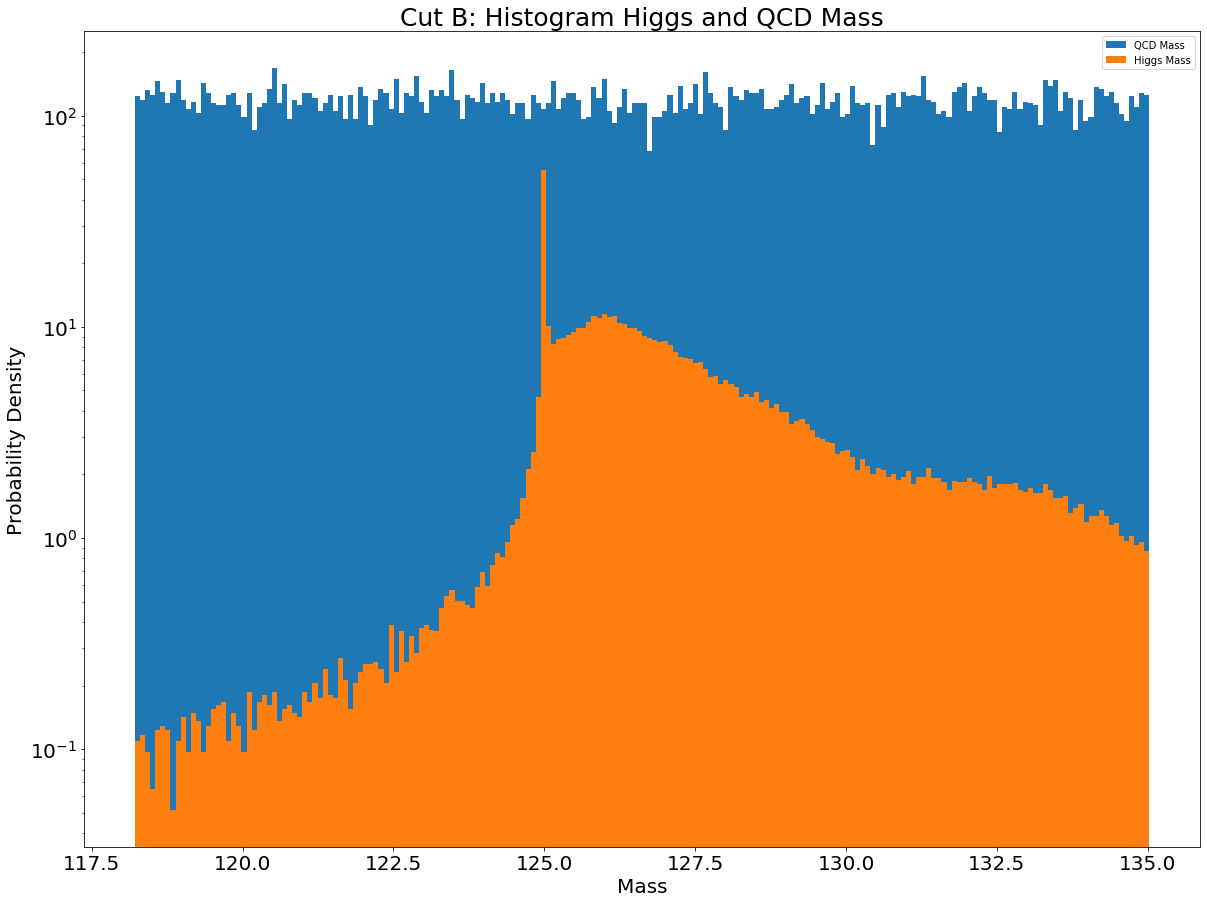

Expected yeild qcd =  2000.0000000000011
Expected yeild higgs =  50.00000000000001


In [7]:
#---- Plotting Cut B----

#qcd data 
hist_qcd, bins_q = np.histogram(qMassB, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMassB, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")

#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Cut B: Histogram Higgs and QCD Mass', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))

Here we can see the expected particle yeilds are the correct values, so the graph is normalized. 

**Calculate Significance for Cut B**

In [8]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)


#Higgs: Calculate 5 sigma upper bound
hMeanB = np.mean(hMassB)
hStdB = np.std(hMassB)

print()

hUpperB = stats.poisson.isf(probability, mu=hMeanB, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpperB)

hLowerB = stats.poisson.isf(1 - probability, mu=hMeanB, loc=0)
print('Lower bound signal strength = ', hLowerB)

print()

#QCD: Calculate 5 sigma upper bound
qMeanB = np.mean(qMassB)
qUpperB = stats.poisson.isf(probability, mu=qMeanB)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpperB)

qLowerB = stats.poisson.isf(1 - probability, mu=qMeanB, loc=0)
print('Lower bound signal strength = ', qLowerB)

stn = hUpperB / qUpperB
print('signal to noise ratio = ', stn)


Higgs Signal 5 sigma detection:
Upper bound signal strength =  188.0
Lower bound signal strength =  75.0

QCD Signal 5 sigma detection:
signal strength =  187.0
Lower bound signal strength =  75.0
signal to noise ratio =  1.0053475935828877


Here we can see that the signal to noise ratio has increased.
The ratio increased from 0.75 to 1.0. This means we have optmized the data, and while this is a good increase, it is not optimal.


#### Cut C:
- After trying many different mass windows, **the optimal cut was Cut C**. In this cut I decreased the size of the mass window in increments, and after graphing each increment I was able to visually see what value could be used to make the mass window even smaller, without loosing large amounts of Higgs data, but cutting as much QCD data as possible. After trying different cuts of the data, the code below for Cut C is the cut that optimized the data the best. This was the cut that had the least QCD data points and the most Higgs data points. 

Below is my code for cut C:

In [9]:
#---Cut C Code
hMassCut = []
qMassCut = []
hMean = np.mean(hMass)
hStd = np.std(hMass)
upperBound = 145
lowerBound = 40

for i in range(len(hMass)):
    if hMass[i] < upperBound and hMass[i] > lowerBound:
        hMassCut.append(hMass[i])
    if qMass[i] < upperBound and qMass[i] > lowerBound:
        qMassCut.append(qMass[i])

print('Percent of total Higgs data Kept = ', len(hMassCut)/len(hMass))

Percent of total Higgs data Kept =  0.99886


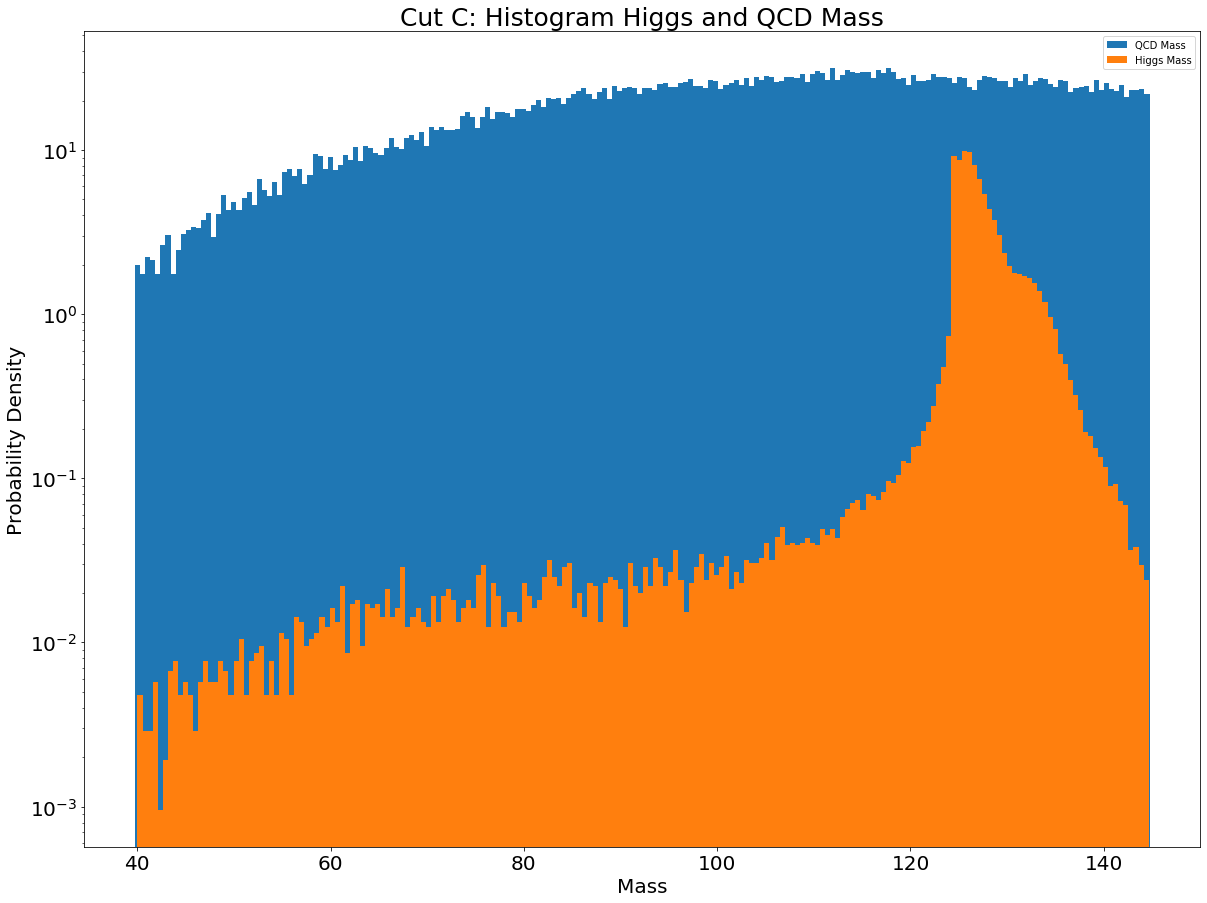

Expected yeild qcd =  2000.0000000000002
Expected yeild higgs =  50.0


In [10]:
#---- Plotting Cut C----

#qcd data 
hist_qcd, bins_q = np.histogram(qMassCut, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMassCut, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")

#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Cut C: Histogram Higgs and QCD Mass', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))

Here we can see that the data is still normalized to the 

In [11]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)


#Higgs: Calculate 5 sigma upper bound
hMeanB = np.mean(hMassCut)
hStdB = np.std(hMassCut)

hUpperB = stats.poisson.isf(probability, mu=hMeanB, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpperB)

hLowerB = stats.poisson.isf(1 - probability, mu=hMeanB, loc=0)
print('Lower bound signal strength = ', hLowerB)

print()

#QCD: Calculate 5 sigma upper bound
qMeanB = np.mean(qMassCut)
qUpperB = stats.poisson.isf(probability, mu=qMeanB)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpperB)

qLowerB = stats.poisson.isf(1 - probability, mu=qMeanB, loc=0)
print('Lower bound signal strength = ', qLowerB)

print() 

stn = hUpperB / qUpperB
print('signal to noise ratio = ', stn)

Higgs Signal 5 sigma detection:
Upper bound signal strength =  187.0
Lower bound signal strength =  75.0

QCD Signal 5 sigma detection:
signal strength =  160.0
Lower bound signal strength =  58.0

signal to noise ratio =  1.16875


It produced the highest signal to noise ratio significance of **1.16875**, greater than with no mass window by ~ 0.42.

After trying different mass window cuts, this is the cut that optimized the chance of measuring a Higgs count the best. 

### Problem 3
Optimization Cuts for other variables 

#### Set A: Plots without any event selection
After exploring all the other variables, I only found one variable that had as much discrimination power as mass, this was Transverse Momentum.

Below is the code for the trial of Transverse Momentum with no event selection.

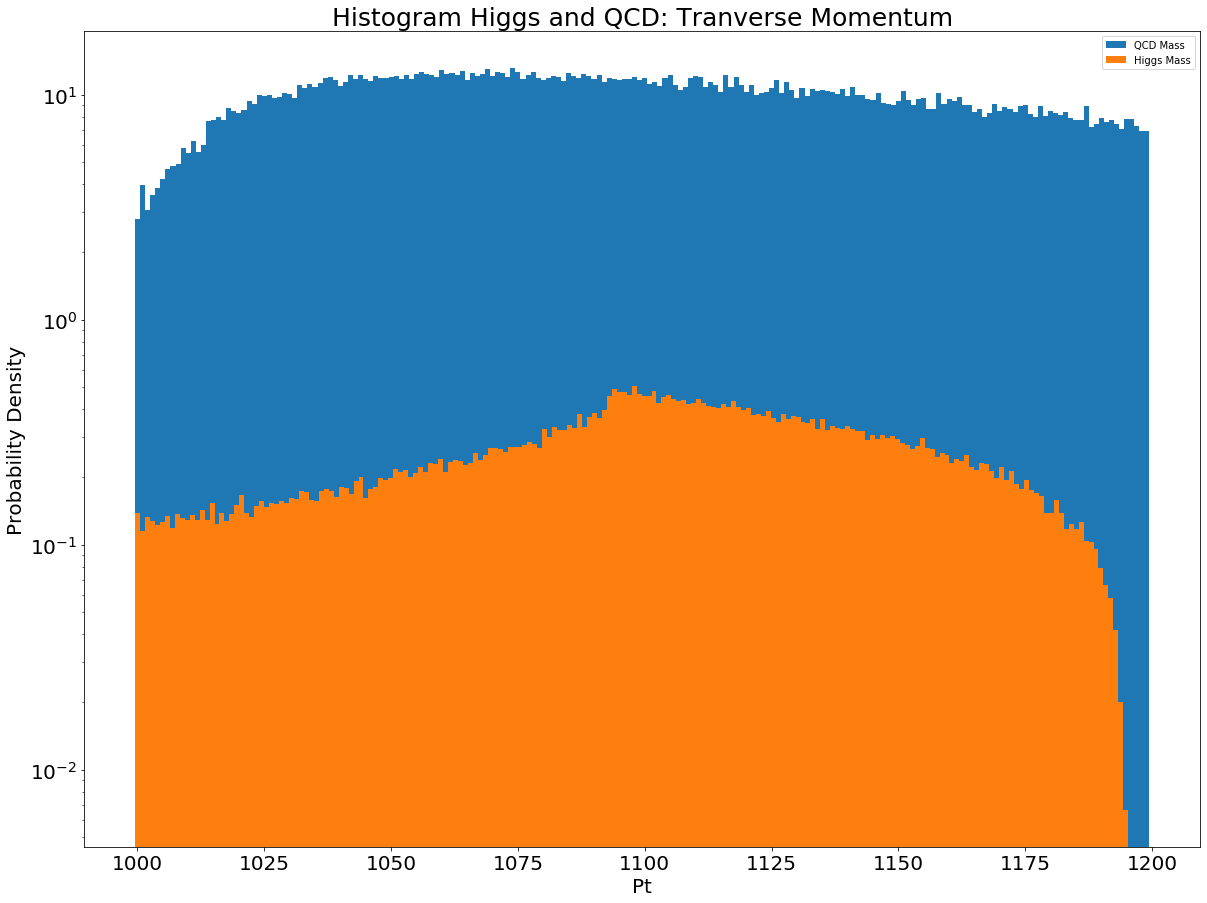

Expected yeild qcd =  2000.0000000000005
Expected yeild higgs =  49.999999999999986


In [13]:
#---- Plotting Transverse Momentum ----

#qcd data 
hist_qcd, bins_q = np.histogram(qPt, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hPt, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")
#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Pt', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Histogram Higgs and QCD: Tranverse Momentum', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))

We can see this data is correctly normalized to the correct expected yeild value.

**Calculate Signifance for Pt**

In [14]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)

#Higgs: Calculate 5 sigma upper bound
hMean = np.mean(hPt)
hStd = np.std(hPt)
print('standard deviation of higgs mass = ', hStd)
print('mean higgs mass value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound signal strength = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qMean = np.mean(qPt)
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpper)

qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound signal strength = ', qLower)

print()

stn = hUpper / qUpper
print('signal to noise ratio = ', stn)


standard deviation of higgs mass =  45.83775867291146
mean higgs mass value =  1102.5019962312726

Higgs Signal 5 sigma detection:
Upper bound signal strength =  1272.0
Lower bound signal strength =  941.0

QCD Signal 5 sigma detection:
signal strength =  1269.0
Lower bound signal strength =  937.0

signal to noise ratio =  1.0023640661938533


With no optimization cuts, the signifance found:

- Pt signifance = 1.
- Mass signifance = 0.75. 

The signal to noise ratio signifance for Pt is 1. Compairing this signifance value to the mass signal to noise ratio for signifance found in Problem 1, it is 0.25 greater. 

This means that **Transverse Momentum is another feature that is as discriminative as mass**, with no cut. 

#### Set B: Set of plots with optimal mass cuts
- Identify additional feature to further improve expected significance.

Even though the Transverse momentum had a higher signifance with no event selection, I could not find a cut that increased the signifance more than a value of 1. This means that afterall, **Mass is the variable with the most discrimination power**, because it is possible to look at a mass window that increases the signal to noise ratio to a higher number than any other variable. 

After trying all the different variables with discrimination power found in lab 5, we could not find a cut of a variable that had as much discrimination power as mass. This means the mass cut found in problem one is th optimal set of mass cuts.

Below are my trials for the variables Pt, Tau_3 and KtDeltaR. After creating cuts of these windows, I created a simultanious mass cut to see how each additional feature affected the significance. 

In [15]:
#Defining cuts of data for each varialbe
hMassC = []
qMassC = []

hPtC = []
qPtC = []

hEe2C = []
qEe2C = []

hT2C = []
qT2C = []

hT3C = []
qT3C = []

hT21C = []
qT21C = []

hKtDeltaRC = []
qKtDeltaRC = []



hMean = np.mean(hMass)
hStd = np.std(hMass)

upperBound = 145
lowerBound = 40

for i in range(len(hMass)):
    if hMass[i] < upperBound and hMass[i] > lowerBound:
        
        hMassC.append(hMass[i])
        hPtC.append(hPt[i])
        hEe2C.append(hEe2[i])
        hT2C.append(hT2[i])
        hT3C.append(hT3[i])
        hT21C.append(hT21[i])
        hKtDeltaRC.append(hT21[i])
        
    if qMass[i] < upperBound and qMass[i] > lowerBound:
        
        qMassC.append(qMass[i])
        qPtC.append(qPt[i])
        qEe2C.append(qEe2[i])
        qT2C.append(qT2[i])
        qT3C.append(qT3[i])
        qT21C.append(qT21[i])
        qKtDeltaRC.append(qT21[i])
        
len(hMassC), len(qMassC)
len(hPtC), len(qPtC)

(99886, 47947)

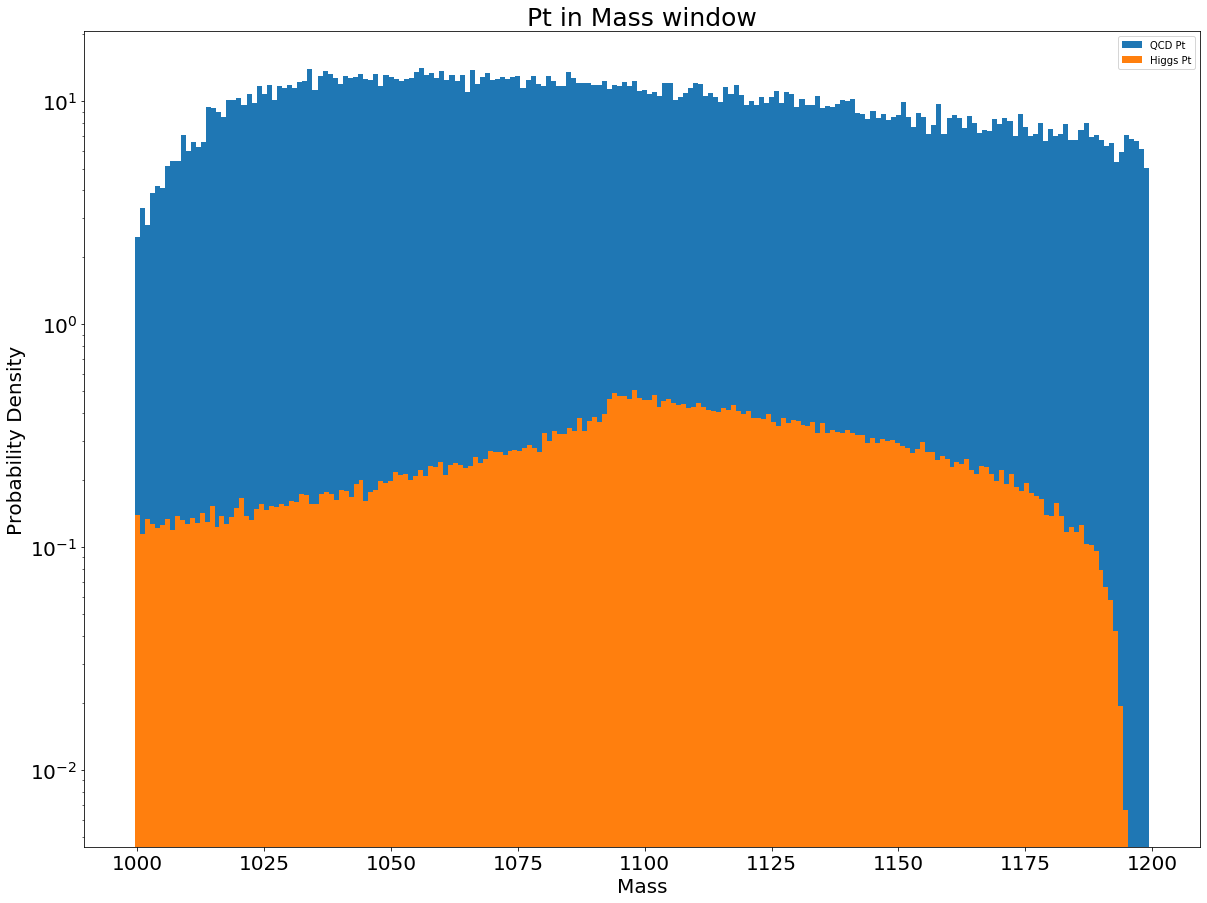

Expected yeild qcd =  1999.9999999999998
Expected yeild higgs =  50.00000000000006


In [16]:
#---- Plotting ----

#qcd data 
hist_qcd, bins_q = np.histogram(qPtC, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Pt')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hPtC, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Pt")
#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Pt in Mass window', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))

**Calculate Signifance for Pt Within this Mass Cut Window**

In [17]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)

#Higgs: Calculate 5 sigma upper bound

#(CHANGE for each different cut)
hMean = np.mean(hPtC)
hStd = np.std(hPtC)
qMean = np.mean(qPtC)

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound signal strength = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpper)

qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound signal strength = ', qLower)

print()

stn = hUpper / qUpper
print('signal to noise ratio = ', stn)

Higgs Signal 5 sigma detection:
Upper bound signal strength =  1272.0
Lower bound signal strength =  941.0

QCD Signal 5 sigma detection:
signal strength =  1264.0
Lower bound signal strength =  933.0

signal to noise ratio =  1.0063291139240507


The signifance increased by 0.001 compaired to the signifance with no mass window, this is an almost non-signifant increase. Unfortuanetly I deleted the rest of the code for this trial, but it was found that the simultanious mass window after an optimization cut for the Pt data did not increase signifance. 

The code below is for KtDeltaR data, and then the following code for the simultaious mass cut.

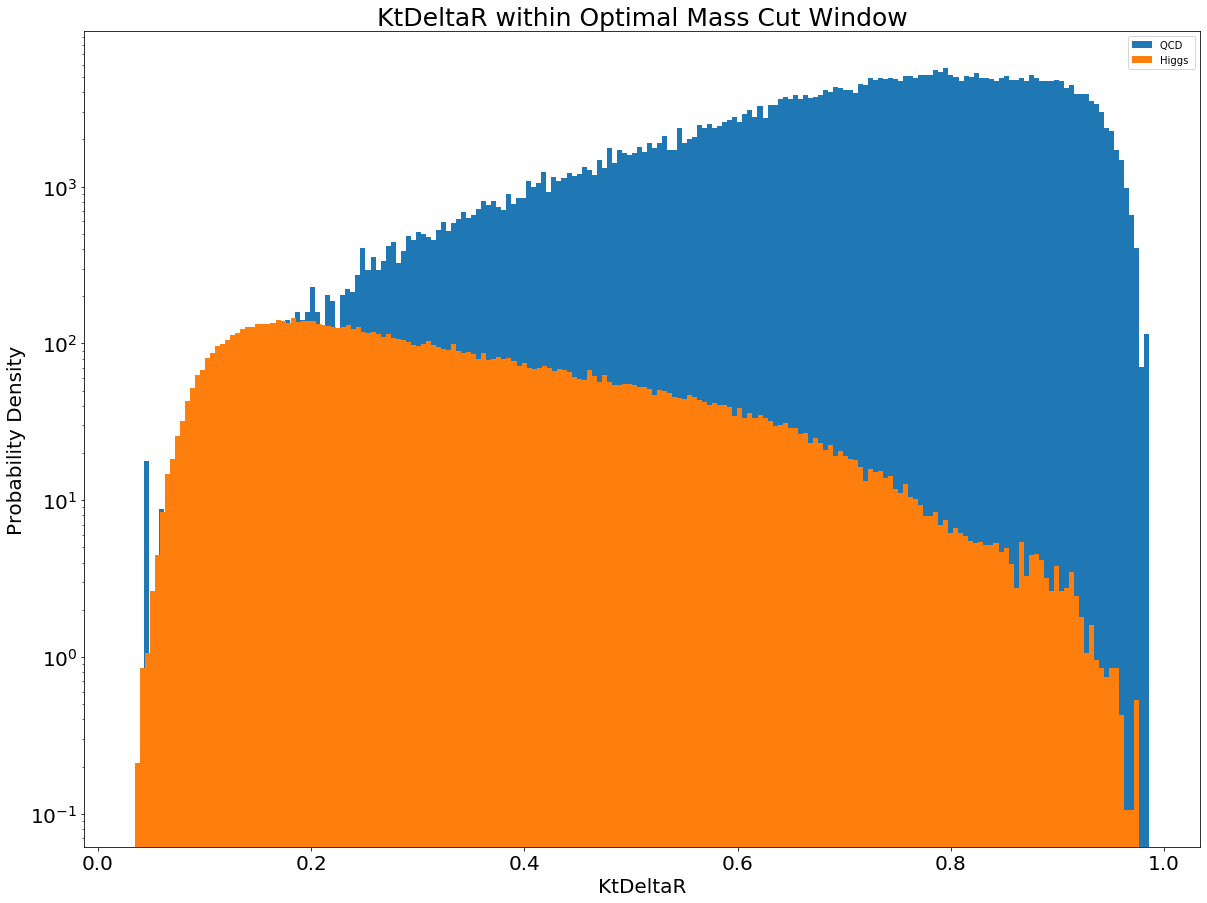

Expected yeild qcd =  1999.999999999999
Expected yeild higgs =  49.999999999999964


In [36]:
#---- Plotting Transverse Momentum ----

#qcd data 
hist_qcd, bins_q = np.histogram(qKtDeltaRC, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD ')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hKtDeltaRC, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs ")
#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('KtDeltaR', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('KtDeltaR within Optimal Mass Cut Window', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))

In [37]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)

#Higgs: Calculate 5 sigma upper bound

#(CHANGE for each different cut)
hMean = np.mean(hKtDeltaRC)
hStd = np.std(hKtDeltaRC)
qMean = np.mean(qKtDeltaRC)

print('standard deviation of higgs data = ', hStd)
print('mean higgs data value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound signal strength = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpper)

qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound signal strength = ', qLower)

print()

stn = hUpper / qUpper
print('signal to noise ratio = ', stn)

standard deviation of higgs data =  0.17603267240146614
mean higgs data value =  0.3338854159423407

Higgs Signal 5 sigma detection:
Upper bound signal strength =  6.0
Lower bound signal strength =  0.0

QCD Signal 5 sigma detection:
signal strength =  8.0
Lower bound signal strength =  0.0

signal to noise ratio =  0.75


This signal to noise ratio is the same as the signifance for the mass data with no event selection. 

Now I will try and use an optimization cut for this KtDeltaR data graphed above. To decide the bounds of the cut, I experimented with different upper and lower bounds, and below is the code for the best bounds I could find:

In [38]:
#Cut for Pt

hMassCut = []
qMassCut = []

hCutB = []
qCutB = []

hMean = np.mean(hKtDeltaR)
hStd = np.std(hKtDeltaR)

upperBound = 0.6
lowerBound = 0.1

# upperBound = 0
# lowerBound = 0.6


for i in range(len(hKtDeltaR)):
    if hKtDeltaR[i] < upperBound and hKtDeltaR[i] > lowerBound:
        
        hCutB.append(hKtDeltaR[i])
        hMassCut.append(hMass[i])
       
    if qKtDeltaR[i] < upperBound and qKtDeltaR[i] > lowerBound:

        qCutB.append(qKtDeltaR[i])
        qMassCut.append(qMass[i])

        
len(qMassCut), len(qCutB)

(53149, 53149)

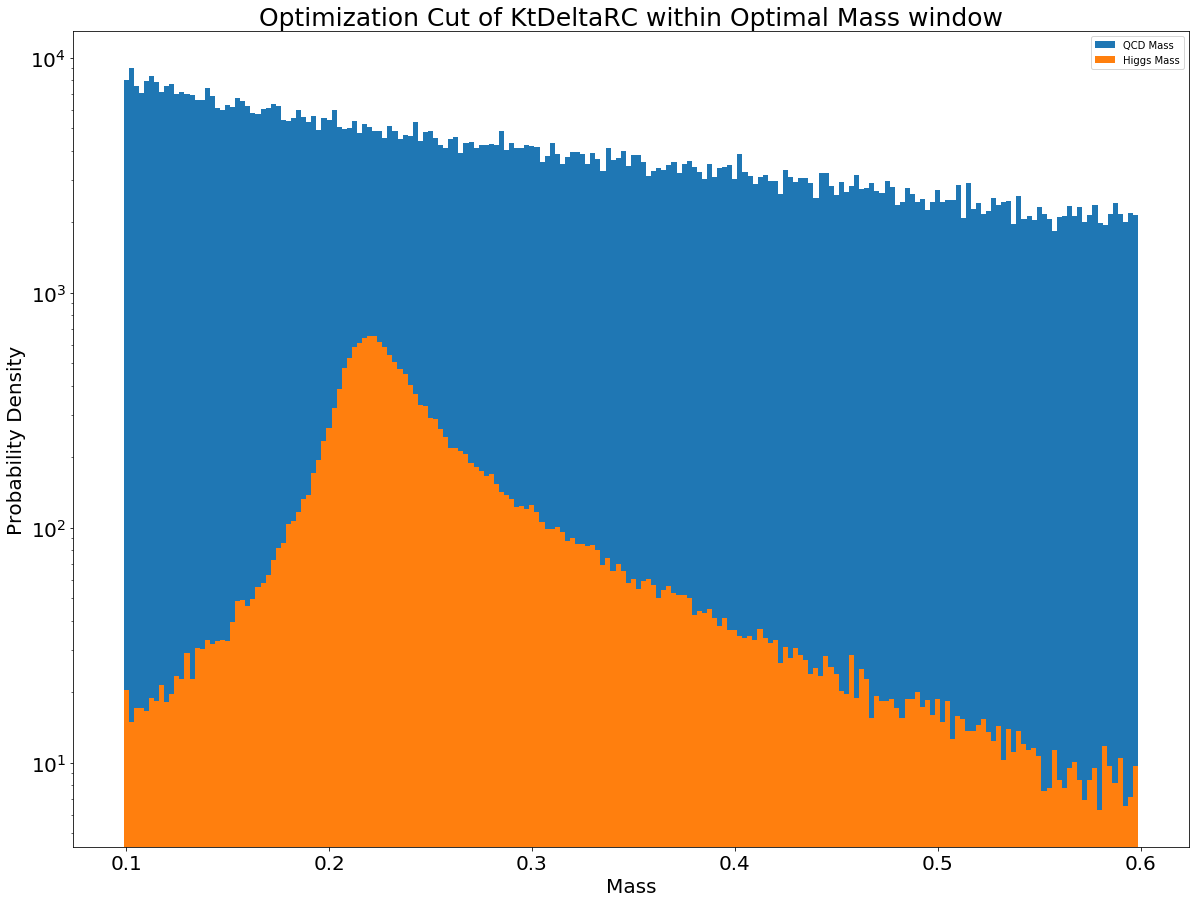

Expected yeild qcd =  2000.0000000000002
Expected yeild higgs =  50.0


In [39]:
        
#---- Plotting Transverse Momentum in mass window w/ CUT ----

#qcd data 
hist_qcd, bins_q = np.histogram(qCutB, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hCutB, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")
#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Optimization Cut of KtDeltaRC within Optimal Mass window', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))


Now calculate the signifance for the optimization cut shown above:

In [34]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)

#Higgs: Calculate 5 sigma upper bound

#(CHANGE for each different cut)
hMean = np.mean(hCutB)
hStd = np.std(hCutB)
qMean = np.mean(qCutB)

print('standard deviation of higgs data = ', hStd)
print('mean higgs data value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound signal strength = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpper)

qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound signal strength = ', qLower)

print()

stn = hUpper / qUpper
print('signal to noise ratio = ', stn)

standard deviation of higgs data =  0.07921646044524218
mean higgs data value =  0.26098975357898424

Higgs Signal 5 sigma detection:
Upper bound signal strength =  6.0
Lower bound signal strength =  0.0

QCD Signal 5 sigma detection:
signal strength =  6.0
Lower bound signal strength =  0.0

signal to noise ratio =  1.0


As we can see from the data above, the KtDeltaR data that was in the range of the optimal Mass Window cut had a signifance of 0.75. After applying another optimization cut, the signifance increased to a value of 1. 

Because the signifance increased, this might be a good variable to use to help create a new better optimized cut of the mass data. 

Below I try optimizing the mass data by selecting the mass values that corespond to the same KtDeltaR cut data in the graph above, creating a simultaious mass cut:

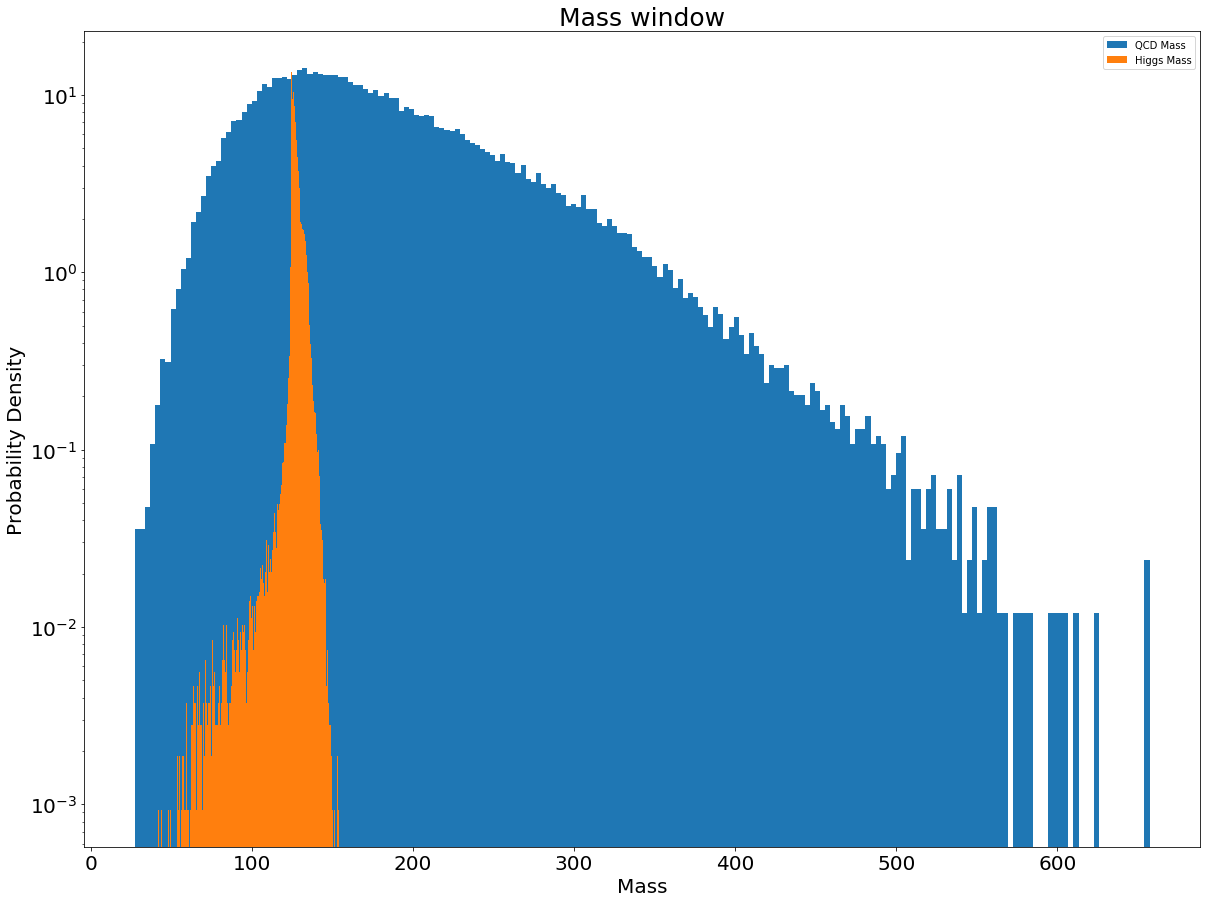

Expected yeild qcd =  1999.999999999999
Expected yeild higgs =  50.000000000000014


In [40]:
#---- Plotting Transverse Momentum in mass window w/ CUT ----

#qcd data 
hist_qcd, bins_q = np.histogram(qMassCut, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd

plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')

# same plot for Higgs Data
hist_higgs, bins_higgs = np.histogram(hMassCut, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs

plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = "Higgs Mass")
#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Mass window', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

print('Expected yeild qcd = ', sum(hist_qcd * widths_qcd))
print('Expected yeild higgs = ', sum(hist_higgs * widths_higgs))

From this graph, we can already see that this cut does not corespond to an optimal cut for the Mass data.

Calculating the signifance:

In [41]:
#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)

#Higgs: Calculate 5 sigma upper bound

#(CHANGE for each different cut)
hMean = np.mean(hMassCut)
hStd = np.std(hMassCut)
qMean = np.mean(qMassCut)

print('standard deviation of higgs data = ', hStd)
print('mean higgs data value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound signal strength = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound signal strength = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('signal strength = ', qUpper)

qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound signal strength = ', qLower)

print()

stn = hUpper / qUpper
print('signal to noise ratio = ', stn)

standard deviation of higgs data =  4.801471050606977
mean higgs data value =  127.65311777997125

Higgs Signal 5 sigma detection:
Upper bound signal strength =  188.0
Lower bound signal strength =  75.0

QCD Signal 5 sigma detection:
signal strength =  252.0
Lower bound signal strength =  118.0

signal to noise ratio =  0.746031746031746


Here we see that the signifance has not improved. Unfortuanetly this was the same as with all other variables.

After trying all the different variables to cut windows simultaniously with my mass no other variables were found to increase the significance. This means **Mass is the variable with most discrimination power**.

### Problem 4

The feature cuts that gave us the best significance is mass. We were not able to find any other variables that improved the significance. The mass variable was by far the best at discriminating between the higgs and the QCD data. 

My significance values are represented by the signal to noise ratio.

My values were:
- Before mass cut significance = 0.75
- After mass cut significance = 1.17

Over all there was an improvement of 0.42 significance after the mass cut was made, which is pretty significant. 

Lab partner's significance: 
Before mass cut significance = 1.13
After mass cut significance = 1.33

Compairing my values to my lab partner's, I started out with a lower significance, and ended with a lower signifance. However my lab partner's overall improvement in signifance values was 0.20, which was about half of my data's imrpovement. However he had higher values to start and end with. 

# Lab 8

Pseudo-experiment data analysis Using optimized event selection, hunt for  signal by using one of the pseduo-experiment dataset. For each task below, choose one of the observed data from your specific pT sample to perform the analysis.|

### Problem 1: High Luminosity Data

The higgs and qcd data are normalized to the expected values of  $N_{qcd} = 2000$ for QCD, and $N_{higgs} = 50$. The High luminosity data is normalized to the observed yield, which is  $N_{total} = N_{qcd} + N_{higgs}$.

This first plot has no event selection.

#### 1.1
It should be noted that because we found that the variable with the most discrimation power is mass, we will be using mass as the distinguishing feature for event selection for both the high and low luminosity data problems.

#### 1.2
In the graph below, we look at the high luminosity data set with no event selection, and calculate the expected and observed signifance values.

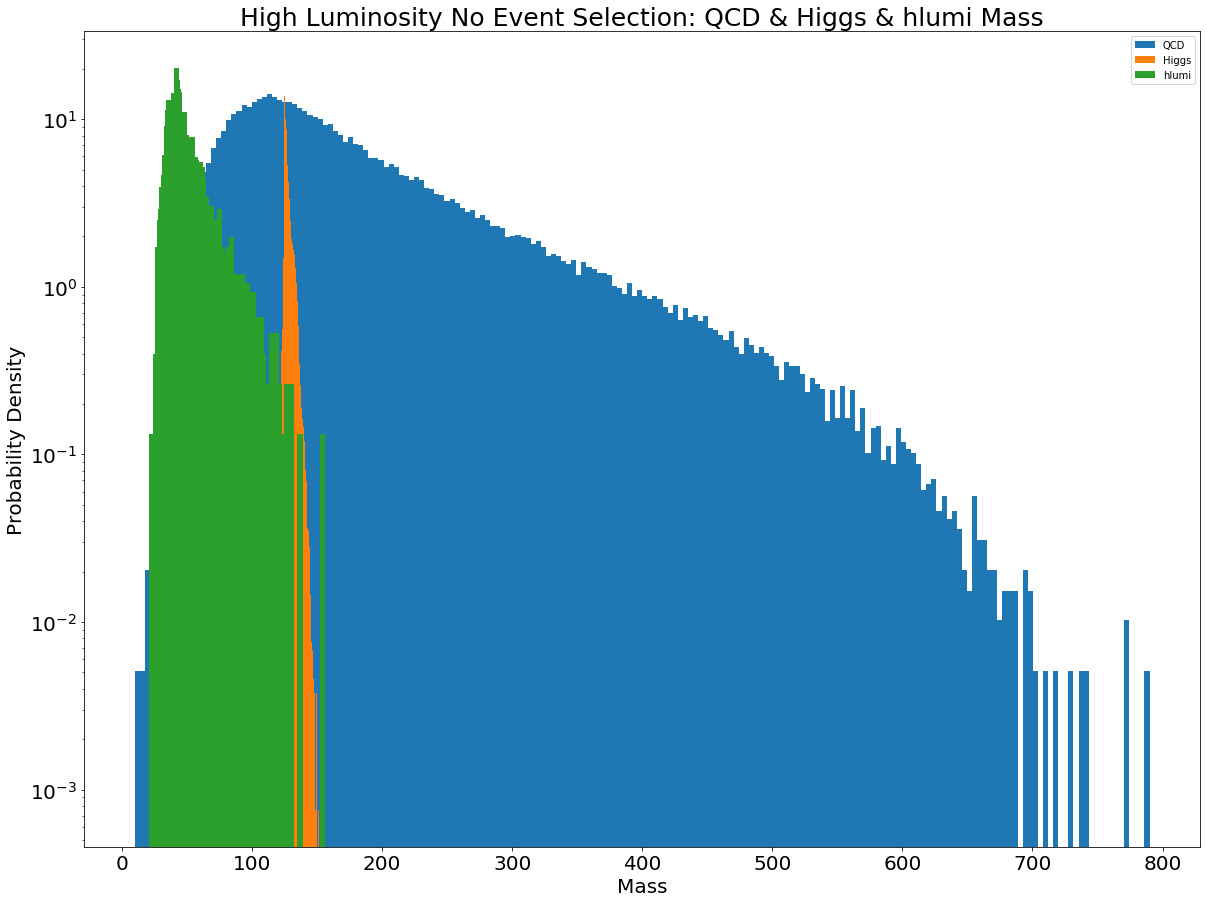

In [48]:
n_higgs = 50
n_qcd = 2000
#this is normalizing the observed data to the total number
n_hlumi = n_qcd + n_higgs

#qcd data
hist_qcd, bins_q = np.histogram(qMass, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD')


#higgs data 
hist_higgs, bins_higgs = np.histogram(hMass, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = 'Higgs')

#hlumi data 
hist_hlumi, bins_hlumi = np.histogram(hlumiMass, bins=200, density=True)
widths_hlumi = np.diff(bins_hlumi)
hist_hlumi *= n_hlumi
plt.bar(bins_higgs[:-1], hist_hlumi, widths_hlumi, label = 'hlumi')

#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('High Luminosity No Event Selection: QCD & Higgs & hlumi Mass', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

In this no event selection graph, blue is QCD data, orange is Higgs data, and Green is High Luminosity data. 

**Calculate Signifance:**

In [53]:
#--- significance calculation --- 

#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)


#HIGGS: Calculate 5 sigma upper bound
hMean = np.mean(hMass)
hStd = np.std(hMass)
# print('standard deviation of higgs mass = ', hStd)
# print('mean higgs mass value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound  = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qMean = np.mean(qMass)
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('Upper Bound = ', qUpper)
qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound = ', qLower)

print()

#HLUMI: Calculate 5 sigma upper bound
hlumiMean = np.mean(hlumiMass)
hlumiUpper = stats.poisson.isf(probability, mu=hlumiMean)
print('hlumi Signal 5 sigma detection:')
print('Upper Bound = ', qUpper)
hlumiLower = stats.poisson.isf(1 - probability, mu=hlumiMean, loc=0)
print('Lower bound = ', hlumiMean)

print()


#Calculate Signal to Noise Ratios
stn = hlumiUpper / qUpper
print('OBSERVED: signal to noise ratio (hlumi / QCD) = ', stn)

#Calculate 
stn = hUpper / qUpper
print('EXPECTED: signal to noise ratio (higgs / QCD) = ', stn)


Higgs Signal 5 sigma detection:
Upper bound  =  187.0
Lower bound =  75.0

QCD Signal 5 sigma detection:
Upper Bound =  248.0
Lower bound =  115.0

hlumi Signal 5 sigma detection:
Upper Bound =  248.0
Lower bound =  175.35201358375062

OBSERVED: signal to noise ratio (hlumi / QCD) =  0.9879032258064516
EXPECTED: signal to noise ratio (higgs / QCD) =  0.7540322580645161


Here we can see the observed and expected signifance values. To increase the signal to noise ratio, next we will:

#### 1.3 Optimal Event Selection: 
**Optimize all data by applying optimal mass cut from lab 7** to remove as much background signal as possible, while keeping as much Higgs and signal like High Luminosity data as possible. 

In [50]:
#--- Cut C (Optimal Mass Cut)
hMassCut = []
qMassCut = []


hMean = np.mean(hMass)
hStd = np.std(hMass)
upperBound = 145
lowerBound = 40

for i in range(len(hMass)):
    if hMass[i] < upperBound and hMass[i] > lowerBound:
        hMassCut.append(hMass[i])
    if qMass[i] < upperBound and qMass[i] > lowerBound:
        qMassCut.append(qMass[i])

hlumiMassCut = []
qlumiMassCut = []
for i in range(len(hlumiMass)):
    if hlumiMass[i] < upperBound and hlumiMass[i] > lowerBound:
        hlumiMassCut.append(hMass[i])


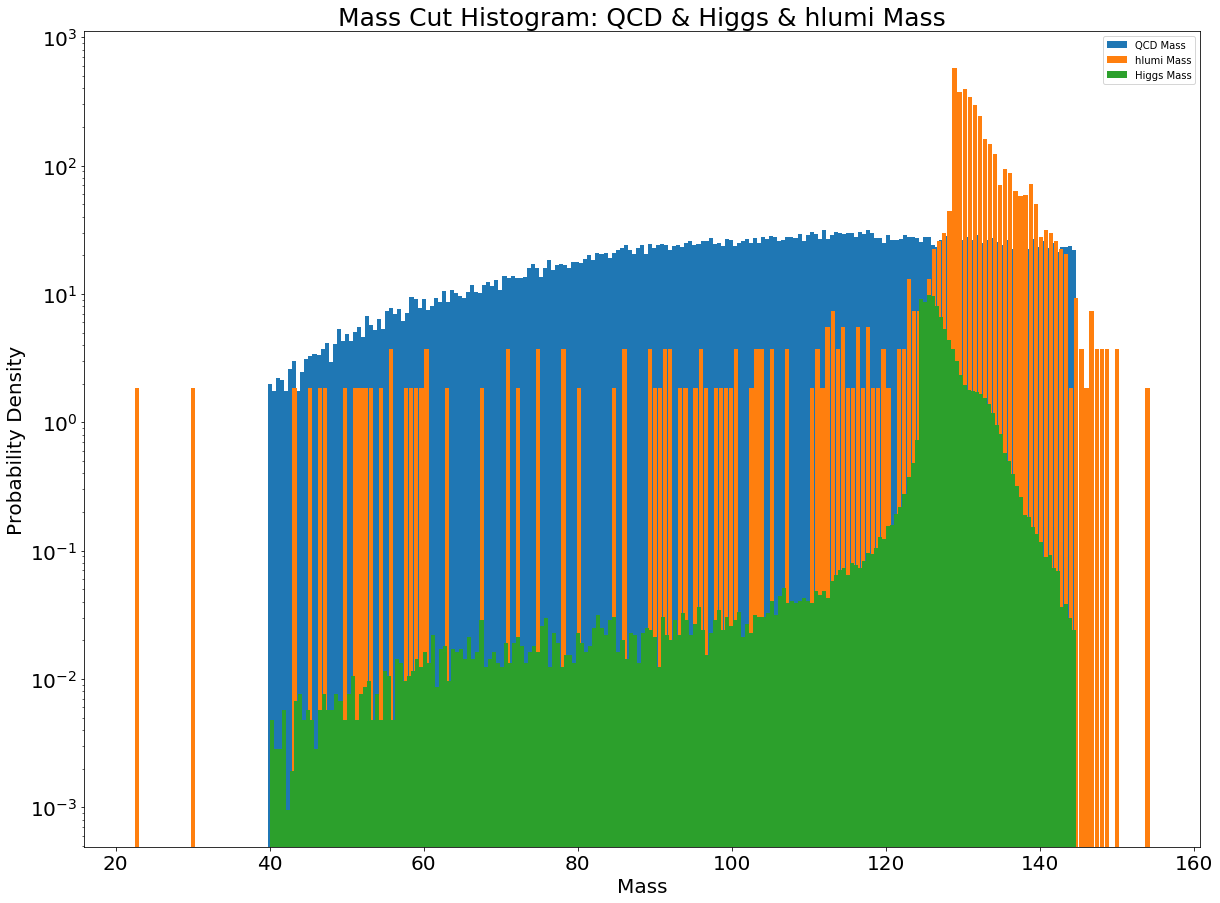

In [51]:
#---- Plotting Cut C----
n_higgs = 50
n_qcd = 2000
#this is normalizing the observed data to the total number
n_hlumi = n_qcd + n_higgs

#qcd data
hist_qcd, bins_q = np.histogram(qMassCut, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')


#hlumi data 
hist_hlumi, bins_hlumi = np.histogram(hlumiMassCut, bins=200, density=True)
widths_hlumi = np.diff(bins_hlumi)
hist_hlumi *= n_hlumi
plt.bar(bins_higgs[:-1], hist_hlumi, widths_hlumi, label = 'hlumi Mass')


#higgs data 
hist_higgs, bins_higgs = np.histogram(hMassCut, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = 'Higgs Mass')

#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Mass Cut Histogram: QCD & Higgs & hlumi Mass', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

In this graph we can see that much of the QCD backgroun data has been removed, While keeping most of the High luminosity data, and Higgs data.

**Claculate significance:**

In [52]:
#--- significance calculation --- 

#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)


#HIGGS: Calculate 5 sigma upper bound
hMean = np.mean(hMassCut)
hStd = np.std(hMassCut)
# print('standard deviation of higgs mass = ', hStd)
# print('mean higgs mass value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound  = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qMean = np.mean(qMassCut)
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('Upper Bound = ', qUpper)
qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound = ', qLower)

print()

#HLUMI: Calculate 5 sigma upper bound
hlumiMean = np.mean(hlumiMassCut)
hlumiUpper = stats.poisson.isf(probability, mu=hlumiMean)
print('hlumi Signal 5 sigma detection:')
print('Upper Bound = ', qUpper)
hlumiLower = stats.poisson.isf(1 - probability, mu=hlumiMean, loc=0)
print('Lower bound = ', hlumiMean)

print()


#Calculate Signal to Noise Ratios
stn = hlumiUpper / qUpper
print('OBSERVED: signal to noise ratio (hlumi to QCD) = ', stn)

#Calculate 
stn = hUpper / qUpper
print('EXPECTED: signal to noise ratio (higgs to QCD) = ', stn)


Higgs Signal 5 sigma detection:
Upper bound  =  187.0
Lower bound =  75.0

QCD Signal 5 sigma detection:
Upper Bound =  160.0
Lower bound =  58.0

hlumi Signal 5 sigma detection:
Upper Bound =  160.0
Lower bound =  126.24716320003341

OBSERVED: signal to noise ratio (hlumi to QCD) =  1.1625
EXPECTED: signal to noise ratio (higgs to QCD) =  1.16875


#### 1.4 Evaluate and Compare Signifance Results

The signifance has increased for both the observed and expected!

With rounding:
- Observed signifance = 1.16
- Expected signifance = 1.17

These are very very close! Because the observed data contains both QCD and Higgs measurements, there is still some background signal in the observed data set. This is why the observed signifance is slightly lower. However, because the observed and expected signifance values are so close, the likelyhood of the observed signal being a Higgs signal is very high.

### Problem 2: Low Luminosity data

First we will plot observed data overlap with the expected signal and background, normalized to the observed particle yeilds the same as for the High Luminosity data.

#### 2.1
Because mass is the feature with the most discrimination power, all the following plots will use mass.

#### 2.2
Here is is the first plot is with no event selection, plotting Low Luminosity data overlap with expected Higgs and QCD signals. 

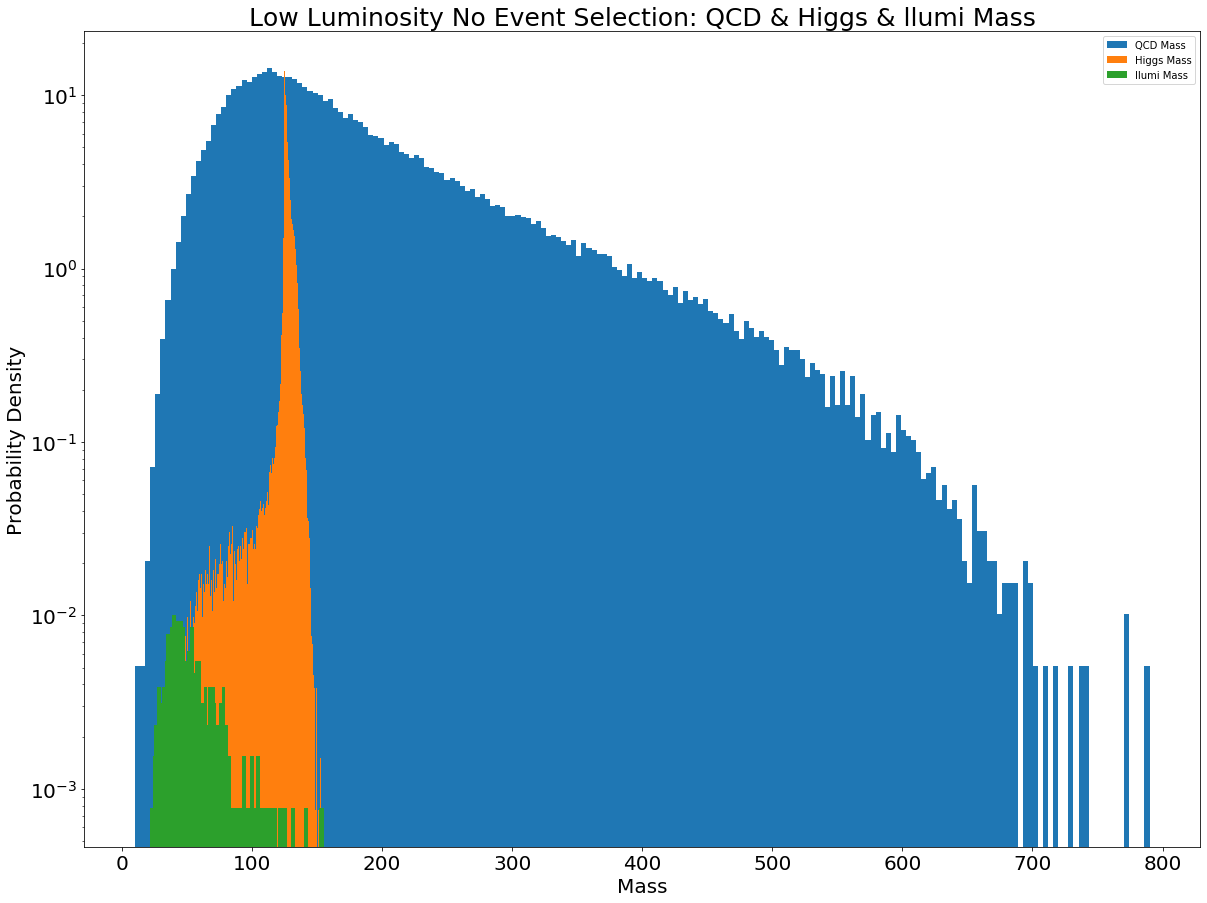

In [54]:
#---Plot low luminosity data No event selection ---

n_higgs = 50
n_qcd = 2000
#this is normalizing the observed data to the total number
n_hlumi = n_qcd + n_higgs

#qcd data
hist_qcd, bins_q = np.histogram(qMass, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')


#higgs data 
hist_higgs, bins_higgs = np.histogram(hMass, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = 'Higgs Mass')

#llumi data 
hist_llumi, bins_llumi = np.histogram(llumiMass, bins=200, density=True)
widths_llumi = np.diff(bins_llumi)
hist_hlumi *= n_hlumi
plt.bar(bins_higgs[:-1], hist_llumi, widths_llumi, label = 'llumi Mass')

#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Low Luminosity No Event Selection: QCD & Higgs & llumi Mass', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

**Calculate signifance:**

In [55]:
#--- significance calculation --- 

#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)


#HIGGS: Calculate 5 sigma upper bound
hMean = np.mean(hMass)
hStd = np.std(hMass)
# print('standard deviation of higgs mass = ', hStd)
# print('mean higgs mass value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound  = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qMean = np.mean(qMass)
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('Upper Bound = ', qUpper)
qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound = ', qLower)

print()

#LLUMI: Calculate 5 sigma upper bound
llumiMean = np.mean(llumiMass)
llumiUpper = stats.poisson.isf(probability, mu=llumiMean)
print('llumi Signal 5 sigma detection:')
print('Upper Bound = ', llumiUpper)
llumiLower = stats.poisson.isf(1 - probability, mu=llumiMean, loc=0)
print('Lower bound = ', llumiMean)

print()


#Calculate Signal to Noise Ratios
stn = llumiUpper / qUpper
print('OBSERVED: signal to noise ratio (hlumi to QCD) = ', stn)

#Calculate 
stn = hUpper / qUpper
print('EXPECTED: signal to noise ratio (higgs to QCD) = ', stn)


Higgs Signal 5 sigma detection:
Upper bound  =  187.0
Lower bound =  75.0

QCD Signal 5 sigma detection:
Upper Bound =  248.0
Lower bound =  115.0

llumi Signal 5 sigma detection:
Upper Bound =  240.0
Lower bound =  171.1325544709575

OBSERVED: signal to noise ratio (hlumi to QCD) =  0.967741935483871
EXPECTED: signal to noise ratio (higgs to QCD) =  0.7540322580645161


Here we can see that these signifance values are similar to the High Luminosity data with no event selection found above in problem 1, however the observed signifance value for low luminosity data is lower by ~ 0.2 compaired to the observed signifance value for high luminosity. 

#### 2.3 Optimal Event Selection: 
**Optimize all data by applying optimal mass cut from lab 7** to remove as much background signal as possible, while keeping as much Higgs and signal like low Luminosity data as possible. 

In [56]:
#Mass cut applied to low luminosity data
hMassCut = []
qMassCut = []


hMean = np.mean(hMass)
hStd = np.std(hMass)
upperBound = 145
lowerBound = 40

for i in range(len(hMass)):
    if hMass[i] < upperBound and hMass[i] > lowerBound:
        hMassCut.append(hMass[i])
    if qMass[i] < upperBound and qMass[i] > lowerBound:
        qMassCut.append(qMass[i])

llumiMassCut = []
for i in range(len(llumiMass)):
    if llumiMass[i] < upperBound and llumiMass[i] > lowerBound:
        llumiMassCut.append(llumiMass[i])


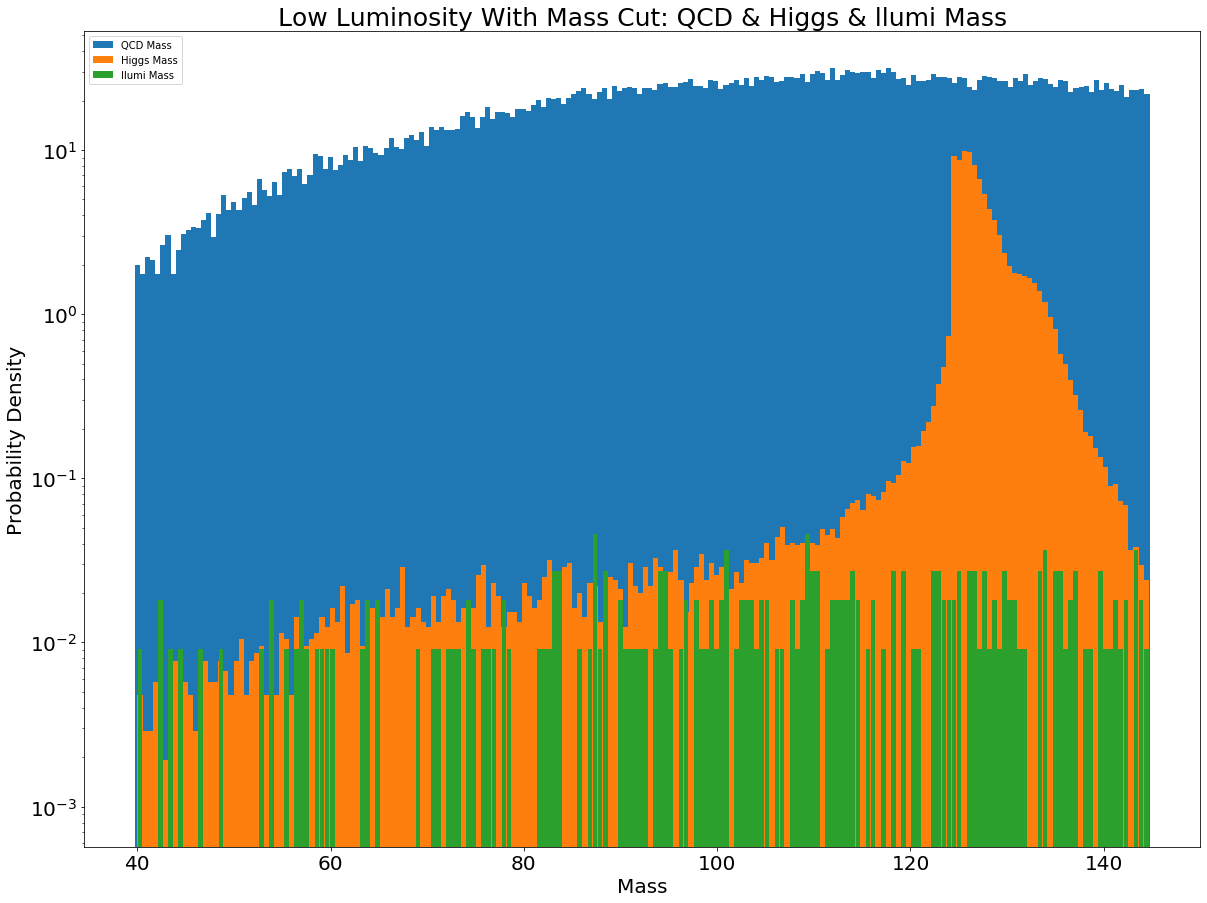

In [57]:
#---Plot low luminosity data No event selection ---

n_higgs = 50
n_qcd = 2000
#this is normalizing the observed data to the total number
n_hlumi = n_qcd + n_higgs

#qcd data
hist_qcd, bins_q = np.histogram(qMassCut, bins=200, density=True)
widths_qcd = np.diff(bins_q)
hist_qcd *= n_qcd
plt.bar(bins_q[:-1], hist_qcd, widths_qcd, label = 'QCD Mass')


#higgs data 
hist_higgs, bins_higgs = np.histogram(hMassCut, bins=200, density=True)
widths_higgs = np.diff(bins_higgs)
hist_higgs *= n_higgs
plt.bar(bins_higgs[:-1], hist_higgs, widths_higgs, label = 'Higgs Mass')

#llumi data 
hist_llumi, bins_llumi = np.histogram(llumiMassCut, bins=200, density=True)
widths_llumi = np.diff(bins_llumi)
hist_hlumi *= n_hlumi
plt.bar(bins_higgs[:-1], hist_llumi, widths_llumi, label = 'llumi Mass')

#Styles
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Mass', size = 20)
plt.ylabel('Probability Density', size = 20)
plt.title('Low Luminosity With Mass Cut: QCD & Higgs & llumi Mass', size = 25)
plt.legend(loc = 'best', fontsize = 'xx-large')
plt.legend()

plt.show()

**Calculate Signifance:**

In [59]:
#--- significance calculation --- 

#find 5 sigma probability from gaussian
sigma5 = 5;
probability = stats.norm.sf(sigma5)


#HIGGS: Calculate 5 sigma upper bound
hMean = np.mean(hMassCut)
hStd = np.std(hMassCut)
# print('standard deviation of higgs mass = ', hStd)
# print('mean higgs mass value = ', hMean)

print()

hUpper = stats.poisson.isf(probability, mu=hMean, loc=0)
print('Higgs Signal 5 sigma detection:')
print('Upper bound  = ', hUpper)

hLower = stats.poisson.isf(1 - probability, mu=hMean, loc=0)
print('Lower bound = ', hLower)

print()

#QCD: Calculate 5 sigma upper bound
qMean = np.mean(qMassCut)
qUpper = stats.poisson.isf(probability, mu=qMean)
print('QCD Signal 5 sigma detection:')
print('Upper Bound = ', qUpper)
qLower = stats.poisson.isf(1 - probability, mu=qMean, loc=0)
print('Lower bound = ', qLower)

print()

#LLUMI: Calculate 5 sigma upper bound
llumiMean = np.mean(llumiMassCut)
llumiUpper = stats.poisson.isf(probability, mu=llumiMean)
print('llumi Signal 5 sigma detection:')
print('Upper Bound = ', llumiUpper)
llumiLower = stats.poisson.isf(1 - probability, mu=llumiMean, loc=0)
print('Lower bound = ', llumiMean)

print()


#Calculate Signal to Noise Ratios
stn = llumiUpper / qUpper
print('OBSERVED: signal to noise ratio (llumi to QCD) = ', stn)

#Calculate 
stn = hUpper / qUpper
print('EXPECTED: signal to noise ratio (higgs to QCD) = ', stn)


Higgs Signal 5 sigma detection:
Upper bound  =  187.0
Lower bound =  75.0

QCD Signal 5 sigma detection:
Upper Bound =  160.0
Lower bound =  58.0

llumi Signal 5 sigma detection:
Upper Bound =  163.0
Lower bound =  107.39732886930499

OBSERVED: signal to noise ratio (llumi to QCD) =  1.01875
EXPECTED: signal to noise ratio (higgs to QCD) =  1.16875


#### 2.4 Evaluate and Compare Signifance Results

The signifance has increased for both the observed and expected!

With rounding:
- Observed signifance = 1.02
- Expected signifance = 1.17

While the mass cut did increase both the observed and expected signifance values, because the observed data contains both QCD and Higgs measurements, there is still a background signal in the observed data set, and apparently there is more background QCD data in this Low Luminosity data set.

This is why the observed signifance is lower than the Expected signifance. 

### Problem 3: 95% Confidence Level of signal Yields

This problem works with the Low Luminosity data.

#### 3.1
In the low luminosity data, the observed signifance is less than 5σ, so I will calculate the 95% confidence level upper limit of the signal yield.

To do this I use Poisson statistics, and use the Low Luminosity data from after the mass cut is applied. This leads to a more accurate confidence level.

In [67]:
#In the code below:

#q is the upper tail probability
q = 0.95

#mu is the mean of the low luminosity data
mu = np.mean(llumiMassCut)
upperLevel = stats.poisson.isf(q, mu, loc=0)

print()
print('Low Luminosity Data: 95% confidence level upper limit = ', upperLevel,)


Low Luminosity Data: 95% confidence level upper limit =  91.0


Looking back at my graphs in problem 2, this seems correct visually.

Low luminosity data is the observed data.

**For Low Luminosity Data (observed data), a value of 91 on the mass x axis is the 95% upper limit confidence level.**

This means that if a true Higgs mass was 91, it would be dected 95% of the time.

#### 3.2
Calculate the expected 95% confidence level upper limit.

To do this I use Poisson statistics again.

In [69]:
#In the code below:

#q is the upper tail probability
q = 0.95

#mu is the mean of the low luminosity data
mu = np.mean(hMassCut)
upperLevel = stats.poisson.isf(q, mu, loc=0)

print()
print('Expected Data: 95% confidence level upper limit = ', upperLevel)


Expected Data: 95% confidence level upper limit =  108.0


When looking at the graphs from problem 2, this also makes visual sence. 

**For Expected data, a value of 108.0 on the mass x axis is the 95% upper limit confidence level**.

This means that if a true Higgs mass was 108.0, it would be dected 95% of the time.


#### 3.3
The observed confidence level upper limit is the same as the low luminosity data confidence level upper limit found in 3.1.

#### 3.4
The expected data 95% confidence level upper limit is 108, which is larger by the observed value by 17. 

This is because the observed data is different than the expected data. 